In [1]:
# necessary imports.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
import os
from sklearn.preprocessing import OrdinalEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Only the following libraries will be allowed to be used in the competition:

1. NumPy
2. Pandas
3. Matplotlib
4. Scikit-learn 
5. XGBoost
6. Seaborn
7. Imblearn
8. SciPy
9. Pickle
10. regex
11. Lightgbm
12. Plotly

## Loading the data

In [2]:
train=pd.read_csv(r'/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [4]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
train['last contact date'] = pd.to_datetime(train['last contact date'])

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last contact date  39211 non-null  datetime64[ns]
 1   age                39211 non-null  int64         
 2   job                38982 non-null  object        
 3   marital            39211 non-null  object        
 4   education          37744 non-null  object        
 5   default            39211 non-null  object        
 6   balance            39211 non-null  int64         
 7   housing            39211 non-null  object        
 8   loan               39211 non-null  object        
 9   contact            28875 non-null  object        
 10  duration           39211 non-null  int64         
 11  campaign           39211 non-null  int64         
 12  pdays              39211 non-null  int64         
 13  previous           39211 non-null  int64         
 14  poutco

In [7]:
train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

## EDA

In [8]:
oe=OrdinalEncoder()

In [9]:
for i in train.columns:
    if train[i].dtype == 'object':
        train[i]=oe.fit_transform(train[[i]])
train.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last contact date  39211 non-null  datetime64[ns]
 1   age                39211 non-null  int64         
 2   job                38982 non-null  float64       
 3   marital            39211 non-null  float64       
 4   education          37744 non-null  float64       
 5   default            39211 non-null  float64       
 6   balance            39211 non-null  int64         
 7   housing            39211 non-null  float64       
 8   loan               39211 non-null  float64       
 9   contact            28875 non-null  float64       
 10  duration           39211 non-null  int64         
 11  campaign           39211 non-null  int64         
 12  pdays              39211 non-null  int64         
 13  previous           39211 non-null  int64         
 14  poutco

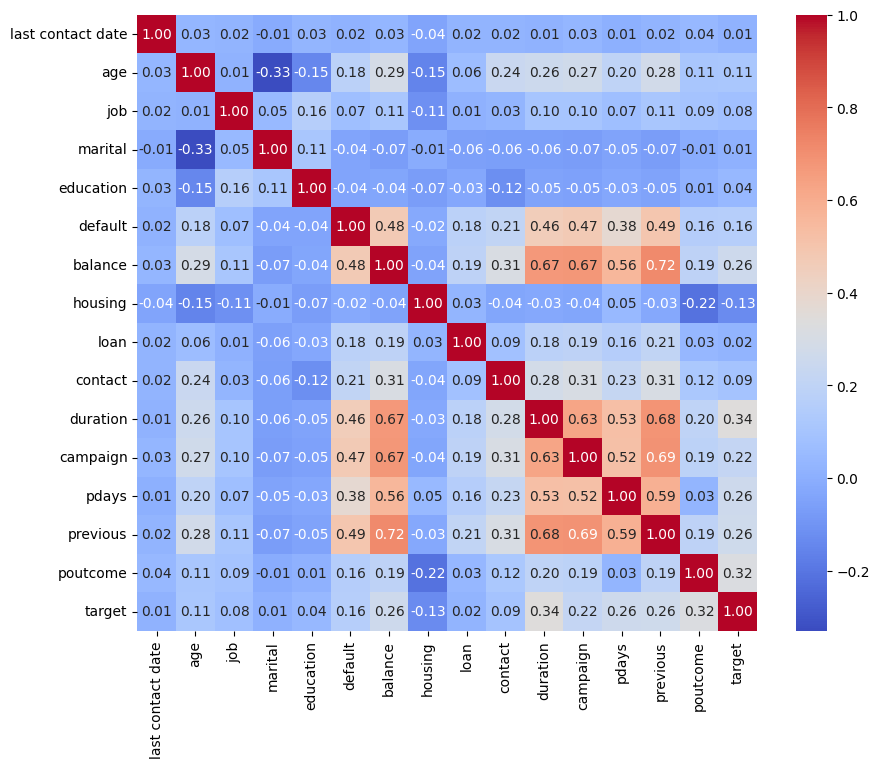

In [10]:
corr=train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [11]:
# train.drop('housing',axis=1,inplace=True)
train.drop('poutcome',axis=1,inplace=True) #dropping this as it contained unecpectedly big amount of null values.

In [12]:
train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,target
0,2009-04-17,26,1.0,1.0,1.0,0.0,647,1.0,0.0,0.0,357,2,331,1,0.0
1,2009-10-11,52,9.0,1.0,1.0,0.0,553,1.0,0.0,1.0,160,1,-1,0,0.0
2,2010-11-20,44,1.0,1.0,1.0,0.0,1397,0.0,0.0,0.0,326,1,-1,0,0.0
3,2009-09-01,33,0.0,1.0,1.0,0.0,394,1.0,0.0,1.0,104,3,-1,0,0.0
4,2008-01-29,31,2.0,2.0,2.0,0.0,137,0.0,0.0,0.0,445,2,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,9.0,2.0,1.0,0.0,0,1.0,0.0,0.0,16,34,-1,0,0.0
39207,2009-07-31,59,0.0,1.0,0.0,0.0,6187,0.0,0.0,0.0,114,4,-1,0,0.0
39208,2008-06-02,36,1.0,1.0,1.0,0.0,63,1.0,0.0,NaN,56,8,-1,0,0.0
39209,2010-03-20,28,8.0,2.0,1.0,0.0,5916,0.0,0.0,0.0,93,5,-1,0,0.0


the dataset now only contains the columns that are positively correlated to the target.

## claning the empty values.

In [13]:
train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
target                   0
dtype: int64

## TTS

## POSSIBLE MODELS.
**1. KNN algorithm**

**2. decision tree**

**3. Logistic Regression**

**4. SVM**

**5. Perceptron**

## Crude workflow.
1. perform EDA-cum-Dimensionaltity reduction.
2. standarsise the data if not in the first step.
3. make the models 
4. tarin the models on the data 
5. test the models 
6. then decide the best one